# Normal Distribution

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

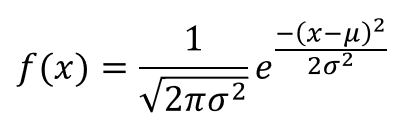

### Problem Statement

#### Question:
Perfume bottles are filled with the average volume of 150 cc and the standard deviation of 2 cc. 
* What percent of bottles will have the volume more than 153 cc?
* What percent of bottles will have the volume between 148 and 152 cc?


In [6]:
# Generating the normal data with mean = 150 and Std = 2
np.random.normal(loc=150, scale=2, size=10)

array([147.60865944, 146.39344137, 148.16643787, 153.42213516,
       151.4637616 , 150.02505148, 151.37651997, 149.40626506,
       150.88070889, 146.33533478])

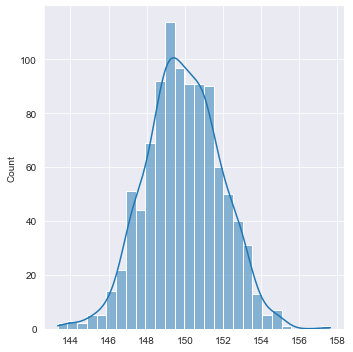

In [16]:
sns.set_style(style='darkgrid')
sns.displot(x=np.random.normal(loc=150, scale=2, size=1000), kind='hist', kde=True)
plt.show()

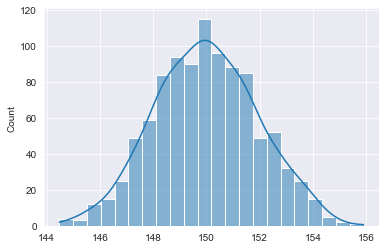

In [15]:
sns.set_style(style='darkgrid')
sns.histplot(x=np.random.normal(loc=150, scale=2, size=1000), kde=True)
plt.show()

[1. 1. 1. ... 1. 1. 1.]


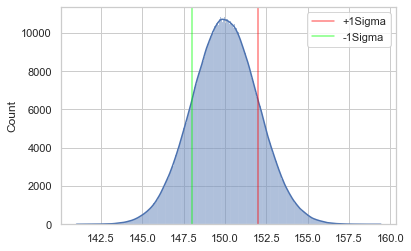

In [44]:
# Generating a larger sample and check for area under the curve 
# for a normal distribution
data_norm = np.random.normal(loc=150, scale=2, size=1000000)
sns.set_theme(style='whitegrid')
sns.histplot(x=data_norm, kde=True)
plt.axvline(x=152, color=[1,0,0,.5], label='+1Sigma')
plt.axvline(x=148, color=[0,1,0,.5], label='-1Sigma')
plt.legend(loc='best')
plt.show()

In [36]:
# Using scipy Survival Function (sf)
p_greater_153 = stats.norm.sf(x=153, loc=150, scale=2)
print(type(p_greater_153))
print(f"""
Percent of bottles will have the volume more than 153 cc is
{np.round(p_greater_153*100, decimals=2)}
""")


<class 'numpy.float64'>

Percent of bottles will have the volume more than 153 cc is
6.68



In [37]:
# Using scipy Survival Function (sf)
p_148_152 = stats.norm.sf(x=148, loc=150, scale=2) - stats.norm.sf(x=152, loc=150, scale=2)
print(f"""
Percent of bottles will have the volume between 148 and 152 cc
{np.round(p_148_152*100, decimals=2) }
""")


Percent of bottles will have the volume between 148 and 152 cc
68.27



In [38]:
# Using scipy CDF
p_lessthan_148 = stats.norm.cdf(x=148, loc=150, scale=2) 
p_lessthan_152 = stats.norm.cdf(x=152, loc=150, scale=2)
print(f"""
Percent of bottles will have the volume between 148 and 152 cc
{np.round((p_lessthan_152-p_lessthan_148) *100, decimals=2) }
""")


Percent of bottles will have the volume between 148 and 152 cc
68.27



#### Question
The mean weight of a morning breakfast cereal pack is 0.295 kg with a standard deviation of 0.025 kg. The random variable weight of the pack follows a normal distribution. 

a)What is the probability that the pack weighs less than 0.280 kg? 

b)What is the probability that the pack weighs more than 0.350 kg? 

c)What is the probability that the pack weighs between 0.260 kg to 0.340 kg? 

In [5]:
# given data
mu = 0.295
sd = 0.025

In [6]:
# a)What is the probability that the pack weighs less than 0.280 kg? 

In [8]:
# Approach1: Calculate the Z Value and then compute cdf
x_bar = 0.28
z = (x_bar - mu)/sd
print(z)
p_less28 = stats.norm.cdf(z)
print('the probability that the pack weighs less than 0.280 kg is {}'.format( p_less28))

-0.5999999999999983
the probability that the pack weighs less than 0.280 kg is 0.2742531177500741


In [10]:
# Appraoch2: Substitute the values directly into CDF

p_less28_direct = stats.norm.cdf(x_bar, loc=mu, scale=sd)
print('the probability that the pack weighs less than 0.280 kg is {}'.format( p_less28_direct))

the probability that the pack weighs less than 0.280 kg is 0.2742531177500741


In [11]:
# b)What is the probability that the pack weighs more than 0.350 kg? 
# p_more350 = 1 - p_less_than_350
x_bar = 0.350
p_more350 = 1 - stats.norm.cdf(x_bar, loc=mu, scale=sd)
print('the probability that the pack weighs more than 0.350 kg is {}'.format( p_more350))

the probability that the pack weighs more than 0.350 kg is 0.01390344751349859


In [14]:
# c)What is the probability that the pack weighs between 0.260 kg to 0.340 kg? 
x1_bar = 0.340
x2_bar = 0.260
p_between260_340 = stats.norm.cdf(x=x1_bar, loc=mu, scale=sd) - stats.norm.cdf(x=x2_bar, loc=mu, scale=sd)
print(f'the probability that the pack weighs between 0.260 kg to 0.340 kg is {p_between260_340:.10f}')

the probability that the pack weighs between 0.260 kg to 0.340 kg is 0.8833130217


In [21]:
# Probabilities between standard deviations of the mean
for i in range(1, 7):
    print('Probabilities of between {} standard deviations from the mean is: {}'.format(i, 
                                    stats.norm.cdf(i)-stats.norm.cdf(-i)))

Probabilities of between 1 standard deviations from the mean is: 0.6826894921370859
Probabilities of between 2 standard deviations from the mean is: 0.9544997361036416
Probabilities of between 3 standard deviations from the mean is: 0.9973002039367398
Probabilities of between 4 standard deviations from the mean is: 0.9999366575163338
Probabilities of between 5 standard deviations from the mean is: 0.9999994266968562
Probabilities of between 6 standard deviations from the mean is: 0.9999999980268246
